In [3]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit.extensions import XGate

In [48]:
data_NEQR = {}

depth is 6.1, # of qubits is 10.0 With size of 1X1


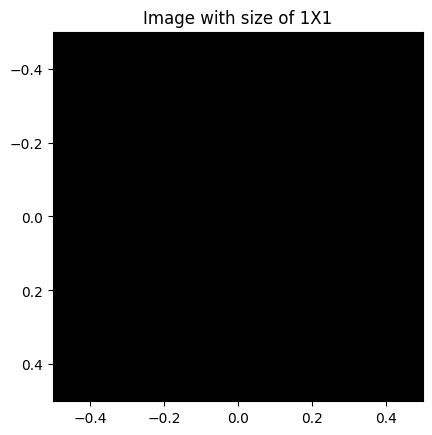

depth is 23.133333333333333, # of qubits is 10.0 With size of 2X2


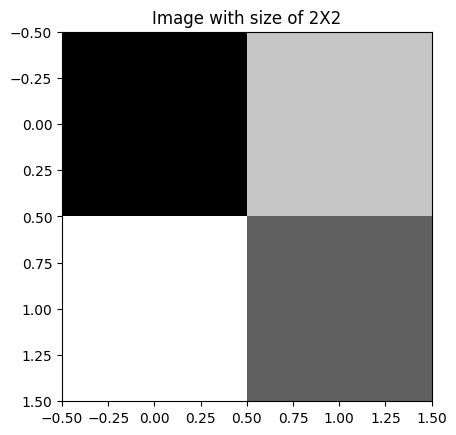

depth is 94.63333333333334, # of qubits is 12.0 With size of 4X4


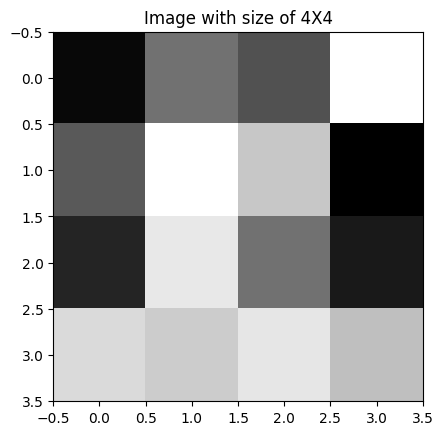

depth is 381.8666666666667, # of qubits is 14.0 With size of 8X8


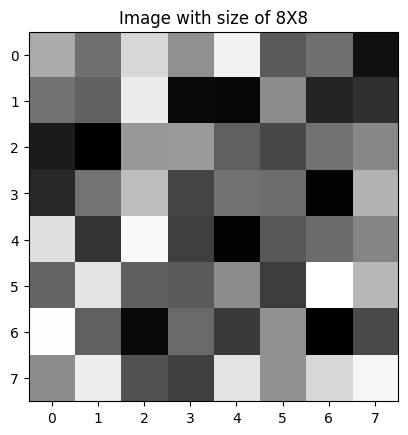

depth is 1533.9333333333334, # of qubits is 16.0 With size of 16X16


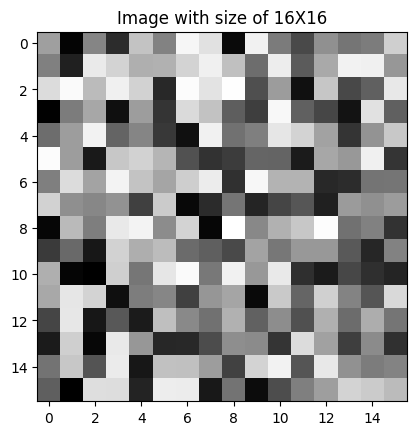

depth is 6137.933333333333, # of qubits is 18.0 With size of 32X32


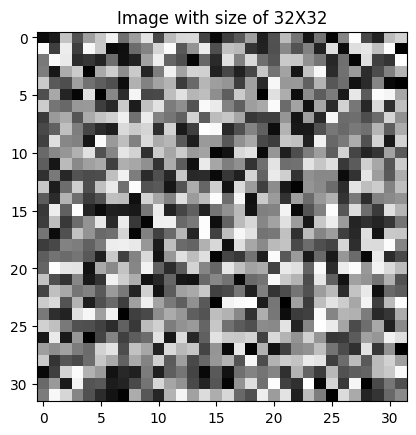

depth is 24512.4, # of qubits is 20.0 With size of 64X64


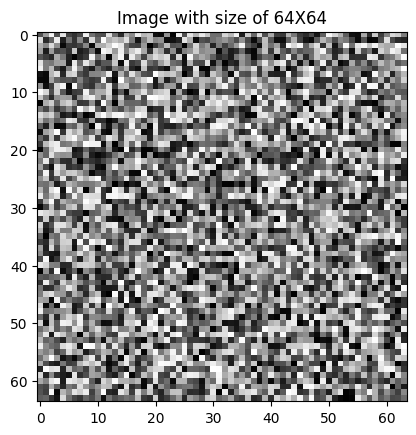

depth is 98023.46666666666, # of qubits is 22.0 With size of 128X128


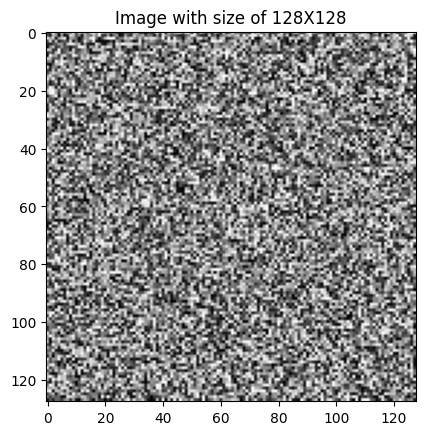

depth is 392161.5333333333, # of qubits is 24.0 With size of 256X256


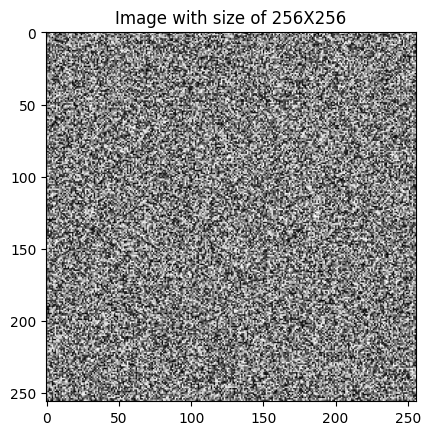

In [61]:
for n in [1,2,4,8,16,32,64,128,256]:
    temp = {"depth":[],"qubit":[]}
    for i in range(0,30):
        image = np.random.uniform(low=0, high=255, size=(n,n)).astype(int)
        # plt.imshow(image, cmap='gray')
        # plt.title('Image')
        # plt.show()

        w_bits = int(np.ceil(math.log(image.shape[1],2)))
        h_bits = int(np.ceil(math.log(image.shape[0],2)))
        if not w_bits: w_bits = 1
        if not h_bits: h_bits = 1
        qc_image = encode_image(image, w_bits, h_bits)
        temp["depth"].append(qc_image.depth())
        temp["qubit"].append(qc_image.num_qubits)
    print("depth is {}, # of qubits is {} With size of {}X{}".format(np.mean(temp["depth"]), np.mean(temp["qubit"]),n,n))
    plt.imshow(image, cmap='gray')
    plt.title('Image with size of {}X{}'.format(n,n))
    plt.show()
    data_NEQR[n]=temp

In [62]:
def encode_image(image, w_bits, h_bits):    
    indx = QuantumRegister(w_bits+h_bits, 'indx')
    intensity = QuantumRegister(8,'intensity')
    cr = ClassicalRegister(len(indx)+len(intensity), 'cr')
    qc_image = QuantumCircuit(intensity, indx, cr)
    num_qubits = qc_image.num_qubits
    input_im = image.copy().flatten()
    qc_image.i(intensity)
    qc_image.h(indx)
    for i, pixel in enumerate(input_im):
        pixel_bin = "{0:b}".format(pixel).zfill(len(intensity))
        position = "{0:b}".format(i).zfill(len(indx))
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
        for idx, px_value in enumerate(pixel_bin[::-1]):
            if(px_value=='1'):
                control_qubits = list(range(intensity.size, intensity.size + indx.size))
                target_qubit = intensity[idx]
                qc_image.mcx(control_qubits, target_qubit)
        if i!=len(input_im) - 1:
            for j, coord in enumerate(position):
                if int(coord):
                    qc_image.x(qc_image.num_qubits-j-1)
        qc_image.barrier()
    qc_image.measure(range(qc_image.num_qubits),range(cr.size))
    return qc_image

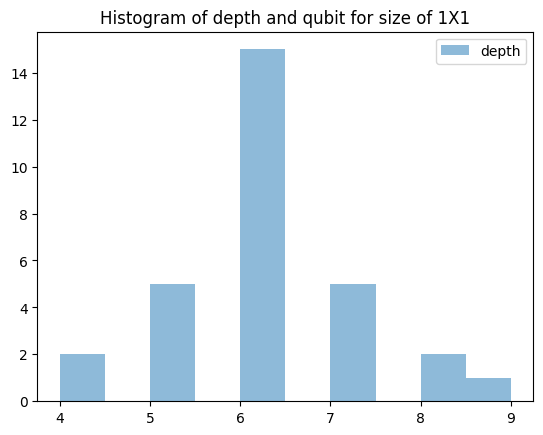

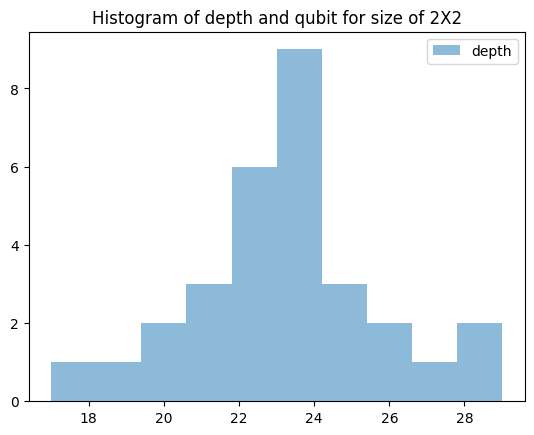

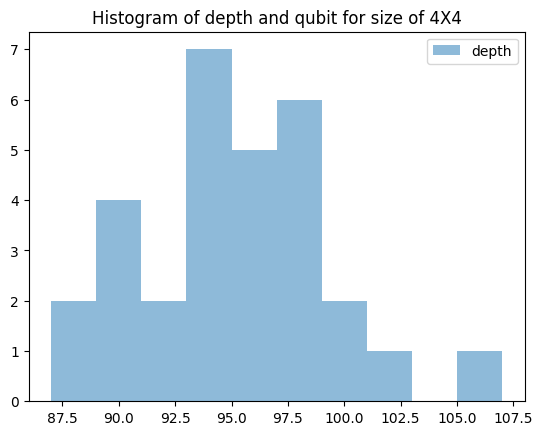

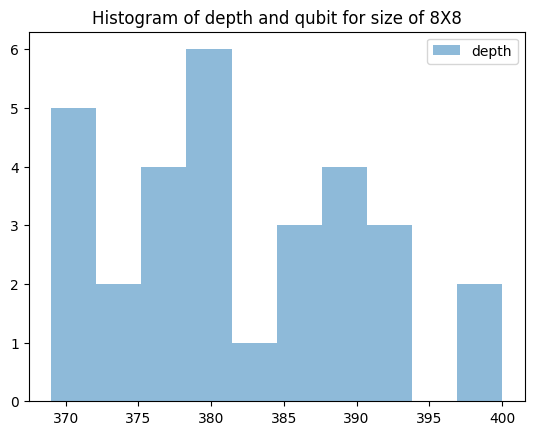

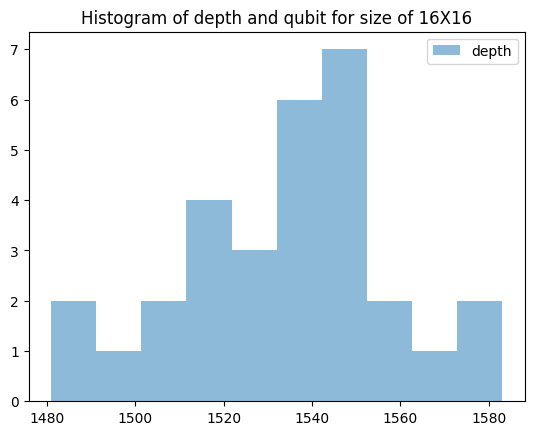

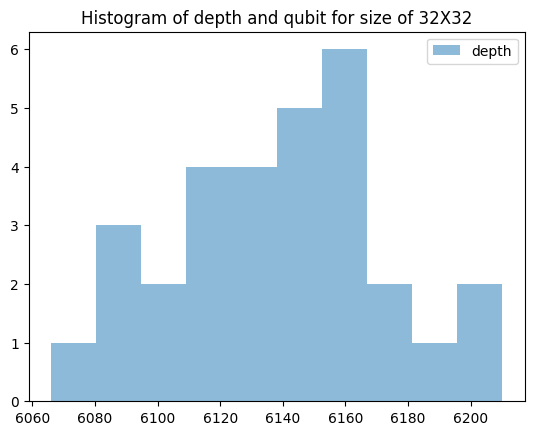

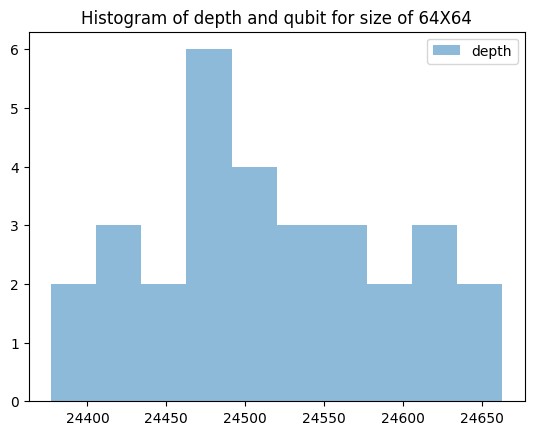

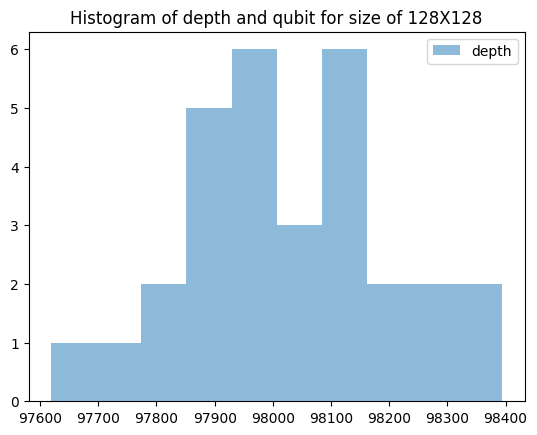

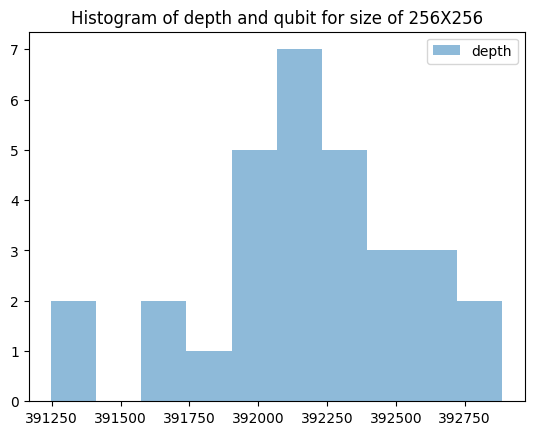

In [12]:
#plot the normal distribution of the depth for each size of image and find the mean and in a matrix
for n in [1,2,4,8,16,32,64,128,256]:
    plt.hist(data_NEQR[n]["depth"], bins=10, alpha=0.5, label='depth')
    plt.legend(loc='upper right')
    plt.title('Histogram of depth and qubit for size of {}X{}'.format(n,n))
    plt.show()

In [4]:
from neqr_output import data as data_NEQR
data=data_NEQR
#plot line graph with depth and qubit and margin of error and on a log scale
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
        x=list(data.keys()),
        y=[np.mean(data[i]["depth"]) for i in data.keys()],
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            symmetric=False,
            array=[max(data[i]["depth"])-np.mean(data[i]["depth"]) for i in data.keys()],
            arrayminus=[max(np.mean(data[i]["depth"])-data[i]["depth"]) for i in data.keys()],
            visible=True)
    ))
fig.show()

In [13]:
import plotly.express as px

fig = px.scatter( x=[2,4,8,16,32,64,128,256], y=[np.mean(data[i]["depth"]) for i in [2,4,8,16,32,64,128,256]],log_y=True)
fig.show()



In [78]:
fig = go.Figure(data=go.Scatter(
        x=list(data.keys()),
        y=[np.mean(data[i]["qubit"]) for i in data.keys()],
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            symmetric=False,
            array=[max(data[i]["qubit"])-np.mean(data[i]["qubit"]) for i in data.keys()],
            arrayminus=[max(np.mean(data[i]["qubit"])-data[i]["qubit"]) for i in data.keys()],
            visible=False)
    ))
fig.show()

In [71]:
data_NEQR.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 128, 256])